<a href="https://www.kaggle.com/code/gabenazario/lending-club-loan-approval-classification?scriptVersionId=99239172" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This project is part of a case study to improve Exploratory Data Analysis, Missing Data handling, Feature Engineering, Deep Learning and Model Creation/Comparison.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load Data Information and create module to retrieve description in case there is doubts while executing work.
data_info = pd.read_csv('../input/lendingclub-data-sets/lending_club_info.csv', index_col='LoanStatNew')

In [3]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [4]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [5]:
#Import data
df = pd.read_csv('../input/lendingclub-data-sets/lending_club_loan_two.csv')

Get an understanding of the dataset and if there is any null cells

In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Start of Exploratory Data Analysis and find important variables for possible use of Feature Engineering

### The goal of project is to predict Loan_Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

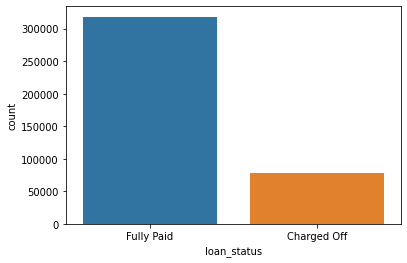

In [8]:
sns.countplot(x=df['loan_status'])

Unballanced database. This could possibly make harder to predict if load will be fully paid.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

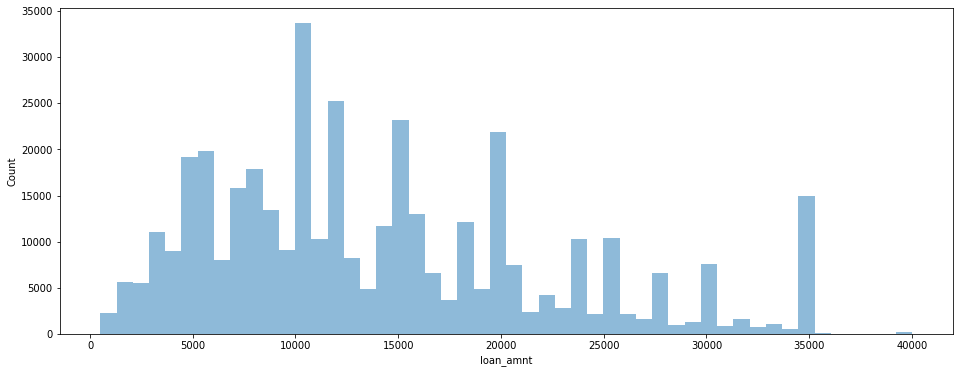

In [9]:
#Check out the loan amount
plt.figure(figsize=(16,6))
sns.histplot(data=df,
             x='loan_amnt',
             bins=50,
             alpha=0.5,
             edgecolor=None) 

Look for correlation between variables (Loan_Status)

<AxesSubplot:>

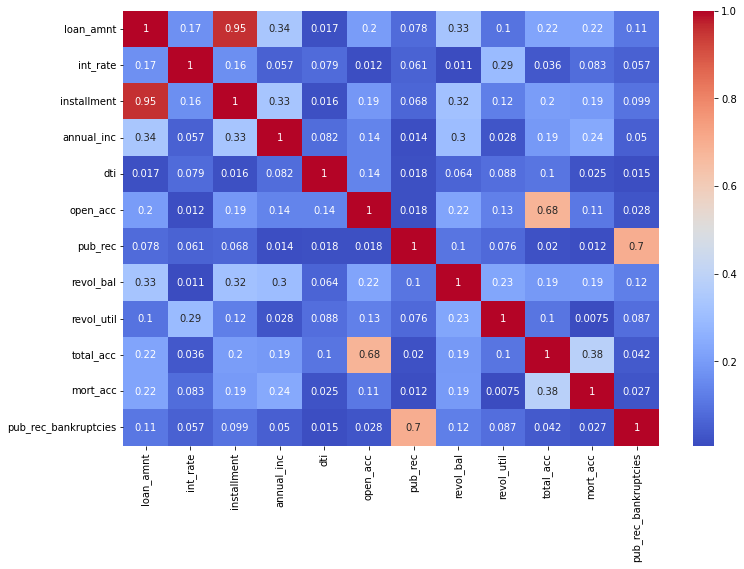

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(np.abs(df.corr()),
            annot=True,
            cmap='coolwarm')

Correlation of 0.95 between installment and loan_amnt.
Probably because installments ammount might increase as you get higher loans. 
Lets explore that

In [11]:
feat_info('installment')
print('\n')
feat_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

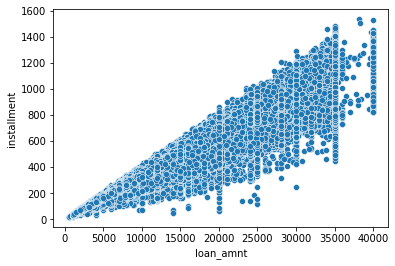

In [12]:
sns.scatterplot(x='loan_amnt',
                y='installment',
                data=df)

Feels like a linear correlation with a lot of noise as you increase the Loan Amount.

Let's move on to Loan Status and Loan Amount

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

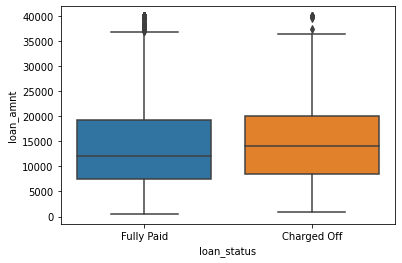

In [13]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

Other tha a slightly higher average, there is no strong correlation that the amount borrowed would lead to default.

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Data complementing chart above.

In [15]:
feat_info('grade')
feat_info('sub_grade') 

LC assigned loan grade
LC assigned loan subgrade


Moving on to Grade and Subgrade
Not a great explanation...

Let's check out unique values

In [16]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

Same as above

In [17]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

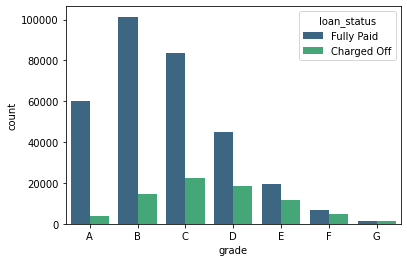

In [18]:
sns.countplot(x='grade',
              data=df,
              hue='loan_status',
              order = sorted(df['grade'].unique()),
             palette='viridis')

Very little information on F and G categories.

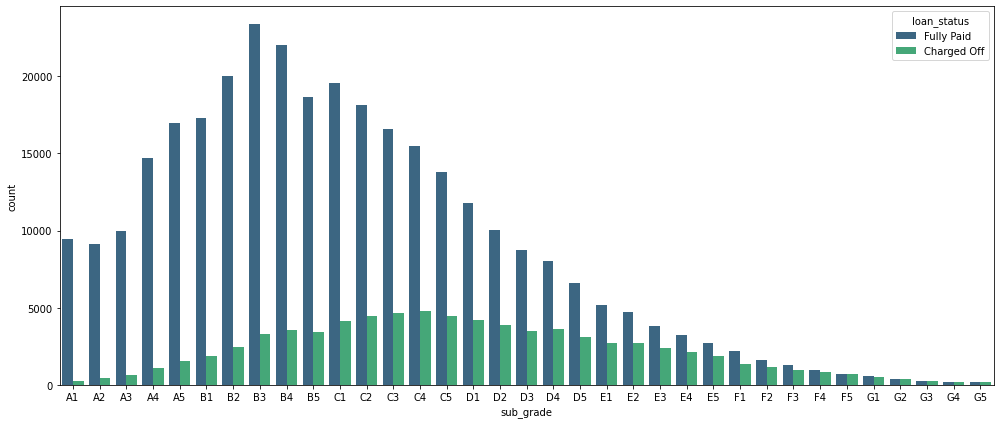

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(x='sub_grade',
              data=df,
              hue='loan_status',
              order=sorted(df['sub_grade'].unique()),
              palette='viridis')
plt.tight_layout()

Fully paied and Charged Off ration for grades E, F and G are low. Let's dive a little into it.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

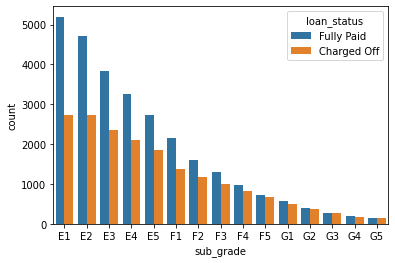

In [20]:
GF_df = df[(df['grade'] == 'G') | (df['grade'] == 'F') | (df['grade'] == 'E')]

sns.countplot(x='sub_grade',
              data=GF_df,
              hue='loan_status',
              order=sorted(GF_df['sub_grade'].unique()))

If there was more explanation between classes we could look futher into the feature. Trying to understand the reasons why it behaves like it does.

### Feature Engineering of Response

Checking featueres under categorical response

In [21]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Reponse is categorical, so we will create a new column and change the strings to zero or one.

In [22]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

Did if work?

In [23]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


Now that we have a categorical column as response, let's check how the features correlate with that.

<AxesSubplot:>

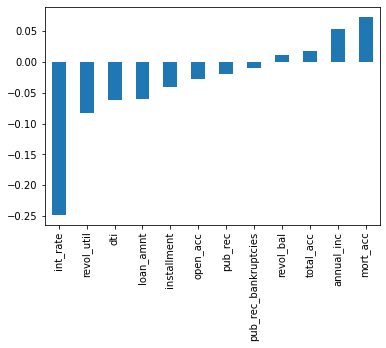

In [24]:
df.corr()['loan_repaid'].sort_values().iloc[:-1].plot(kind='bar')

### That's it for the EDA 

# Section 2 - Data PreProcessing and Feature Engineering

In [25]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## Missing Data

In [26]:
len(df)

396030

In [27]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

See missing data as percentage

In [28]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [29]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [30]:
df['emp_title'].nunique()

173105

That's far too many job titles to easily fill missing data, or create dummy variables.

In [31]:
df['emp_length'].nunique()

11

<AxesSubplot:>

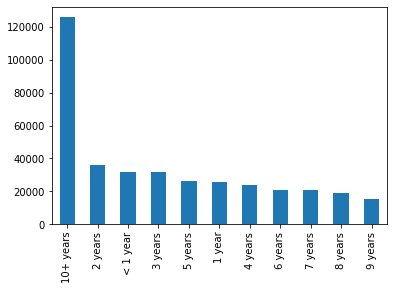

In [32]:
df['emp_length'].value_counts().plot(kind='bar')

Let's see if there is a trend between length of employment and loan status.

In [33]:
order = ['< 1 year',
         '1 year',
         '2 years',
         '3 years',
         '4 years',
         '5 years',
         '6 years',
         '7 years',
         '8 years',
         '9 years',
         '10+ years'
        ]

<AxesSubplot:xlabel='emp_length', ylabel='count'>

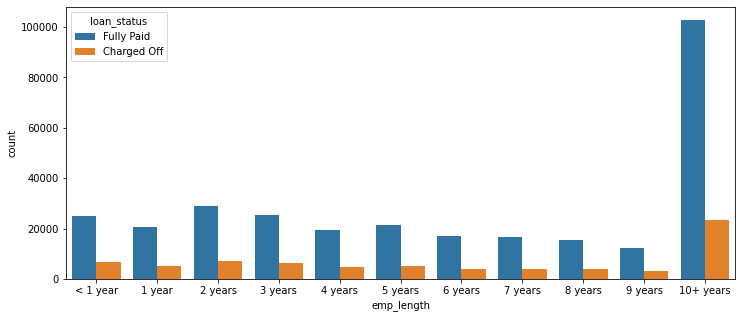

In [34]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['emp_length'], hue=df['loan_status'], order = order)

<AxesSubplot:xlabel='emp_length'>

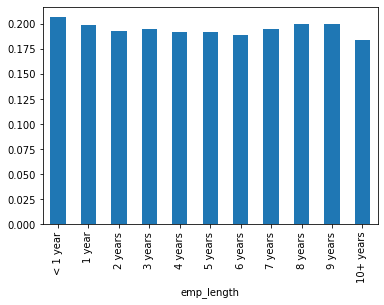

In [35]:
emp_npaid = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count()
emp_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

ratio = emp_npaid/(emp_paid + emp_npaid)
ratio.loc[order].plot(kind = 'bar')

Pretty even across the board. Apparently length of employnment does not correlate with paying the loan.
 
Ratio is similar across length of emplynment, column will be dropped.

In [36]:
df = df.drop(columns=['emp_length','emp_title'], axis=1)

In [37]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [38]:
df[['title','purpose']].value_counts()

title                                  purpose           
Debt consolidation                     debt_consolidation    152106
Credit card refinancing                credit_card            51354
Home improvement                       home_improvement       15182
Other                                  other                  12878
Debt Consolidation                     debt_consolidation     10837
                                                              ...  
Going green for good                   major_purchase             1
Going out high interest credit cards.  credit_card                1
Going to Make it                       credit_card                1
Going to be proud owner of home        house                      1
~Summer Fun~                           home_improvement           1
Length: 54958, dtype: int64

Title column is the same as purpose, but with extra unecessary information. It will be dropped.

In [39]:
df = df.drop('title', axis =1)

In [40]:
feat_info('revol_util')

100* df['revol_util'].isna().sum()/len(df['revol_util'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


0.06969169002348306

Revol_Util missing data is less than .1% of total dataset. Rows will be dropped later.

In [41]:
feat_info('mort_acc')
print('\n')
df['mort_acc'].value_counts()

Number of mortgage accounts.




0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [42]:
df.corr()['mort_acc'].sort_values(ascending=False)[1:]

total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

To fill Mort_Acc we could use the median or remove the column. We will try to find a feature that has the most correlation and use that and group by to do it.

Correlation between mort_acc and total_acc is very low, 38%. That means that there is low correlation and can be ignored.
The study groups the data and fill the NA with the average of that.
For learning purposes I will follow the process, but the correlation is very low and does not hold on its own.

In [43]:
acc_fill = df.groupby(by='total_acc').mean()['mort_acc']

In [44]:
acc_fill

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [45]:
def fill_na(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return acc_fill[total_acc]
    else:
        return mort_acc

In [46]:
df['mort_acc'] = df.apply(lambda x: fill_na(x['total_acc'], x['mort_acc']), axis=1)

In [47]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Dropping NA of all rows that are empty. Less than 1% empty.

In [48]:
df = df.dropna(axis=0)

In [49]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

# Feature Engineering 

## Dealing with Strings and Categorical Columns

In [50]:
df.select_dtypes(include=[object]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [51]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

Let's turn that into integer

In [52]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [53]:
df.select_dtypes(include=[object]).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

Drop Grade because it's part of sub_grade

In [54]:
df.drop(columns=('grade'), axis=1, inplace=True)

In [55]:
df.select_dtypes(include=[object]).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Get those Dummies. 
Turn some features into dummie categorical column.

In [56]:
grade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [57]:
df = pd.concat([df.drop('sub_grade', axis=1), grade_dummies], axis=1)

In [58]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [59]:
other_dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status', 'purpose']], drop_first=True)

In [60]:
df = df.drop(columns=['verification_status','application_type','initial_list_status', 'purpose'], axis=1)
df = pd.concat([df,other_dummies], axis=1)

In [61]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [63]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')

In [64]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [65]:
house_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [66]:
df = df.drop(columns=['home_ownership'], axis=1)
df = pd.concat([df,house_dummies], axis=1)

In [67]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df['zip_code'] = df['address'].str[-5:]
#Extract the ZIP Code

In [69]:
df.drop(columns=['address'], inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 73 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   issue_d                              395219 non-null  object 
 6   loan_status                          395219 non-null  object 
 7   dti                                  395219 non-null  float64
 8   earliest_cr_line                     395219 non-null  object 
 9   open_acc                             395219 non-null  float64
 10  pub_rec                              395219 non-null  float64
 11  revol_bal    

In [71]:
zip_dummies = pd.get_dummies(df['zip_code'], drop_first=True)

In [72]:
df = df.drop(columns=['zip_code'], axis=1)
df = pd.concat([df,zip_dummies], axis=1)

In [73]:
feat_info('issue_d')

The month which the loan was funded


We would not know if the loan was funded or not, so this feature will be dropped to prevent data leakage.

In [74]:
df = df.drop(columns=['issue_d'], axis=1)

In [75]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [76]:
df['earliest_cr_line'].value_counts()

Oct-2000    3013
Aug-2000    2930
Oct-2001    2890
Aug-2001    2879
Nov-2000    2729
            ... 
Jul-1955       1
Oct-1950       1
May-1958       1
Nov-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [77]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
#Extract year from earliest credit line

In [78]:
df.drop(columns=['earliest_cr_line'], axis=1, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

# Model Creation
## Train Test Split

The work will be done comparing a NN with early stopping and one with Droupout feature.

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df.drop(columns=['loan_status'], axis=1, inplace=True)

In [82]:
X = df.drop(columns=['loan_repaid'], axis=1).values
y = df['loan_repaid'].values

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Normalize data

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
X_train = scaler.fit_transform(X_train)

In [87]:
X_test = scaler.transform(X_test)

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

## Will do early stopping and later on add drop out to compare results

In [89]:
df.shape

(395219, 79)

In [90]:
model = Sequential()
earlystopping = EarlyStopping()

2022-06-24 17:33:44.457487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 17:33:44.642351: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 17:33:44.643138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-24 17:33:44.644445: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [91]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [92]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=79,activation='relu'))

model.add(Dense(units=39,activation='relu'))

model.add(Dense(units=19,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [93]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test),
          batch_size = 256,
          callbacks=[early_stop]
          )

2022-06-24 17:33:48.263152: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1081/1081 [==============================] - 5s 3ms/step - loss: 0.2857 - val_loss: 0.2681
Epoch 2/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2625 - val_loss: 0.2633
Epoch 3/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2616 - val_loss: 0.2628
Epoch 4/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2641
Epoch 5/50
1081/1081 [==============================] - 4s 3ms/step - loss: 0.2588 - val_loss: 0.2627
Epoch 6/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2577 - val_loss: 0.2617
Epoch 7/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2572 - val_loss: 0.2639
Epoch 8/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2566 - val_loss: 0.2619
Epoch 9/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2560 - val_loss: 0.2620
Epoch 10/50
1081/1081 [==============================] - 3s 3ms/step - loss: 0.255

In [94]:
model.save('Loan_EarlyStoppingOnly')

2022-06-24 17:36:10.878405: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [95]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

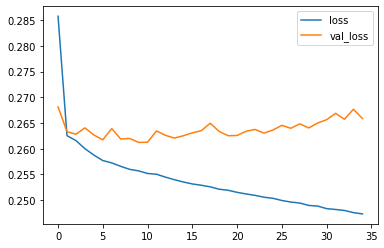

In [96]:
model_loss[['loss', 'val_loss']].plot()

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
pred_ES = (model.predict(X_test) > 0.5).astype("int32")

In [99]:
print(confusion_matrix(y_test, pred_ES))
print('\n')
print(classification_report(y_test, pred_ES))

[[10809 12554]
 [  872 94331]]


              precision    recall  f1-score   support

           0       0.93      0.46      0.62     23363
           1       0.88      0.99      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.90      0.73      0.78    118566
weighted avg       0.89      0.89      0.87    118566



## Dropout

In [100]:
model = Sequential()

model.add(Dense(units=79,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [101]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test),
          batch_size = 256,
          callbacks=[early_stop]
          )

Epoch 1/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.3020 - val_loss: 0.2657
Epoch 2/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2656 - val_loss: 0.2633
Epoch 3/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2626 - val_loss: 0.2627
Epoch 4/100
1081/1081 [==============================] - 4s 3ms/step - loss: 0.2612 - val_loss: 0.2623
Epoch 5/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2606 - val_loss: 0.2623
Epoch 6/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2600 - val_loss: 0.2618
Epoch 7/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2597 - val_loss: 0.2617
Epoch 8/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2591 - val_loss: 0.2614
Epoch 9/100
1081/1081 [==============================] - 3s 3ms/step - loss: 0.2589 - val_loss: 0.2617
Epoch 10/100
1081/1081 [==============================] - 3s 3ms/step - l

In [102]:
model.save('Loan_Dropout')

In [103]:
model_loss_do = pd.DataFrame(model.history.history)

<AxesSubplot:>

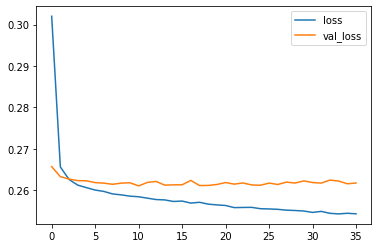

In [104]:
model_loss_do.plot()

In [105]:
pred_DO = (model.predict(X_test) > 0.5).astype("int32")

In [106]:
print(confusion_matrix(y_test, pred_DO))
print('\n')
print(classification_report(y_test, pred_DO))

[[10255 13108]
 [  271 94932]]


              precision    recall  f1-score   support

           0       0.97      0.44      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566



## Test

In [107]:
import random
random.seed(100)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]

new_customer

loan_amnt           15000.00
term                   36.00
int_rate                7.89
installment           469.29
annual_inc          49000.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     2001.00
Name: 76514, Length: 78, dtype: float64

In [108]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [109]:
df.iloc[random_ind]['loan_repaid']

1.0